# Simple Linear Regression

Problem Statment:

You have been provided with a dataset containing information about students' academic performance in their degree programs and their cop placement outcomes in terms of the packages received in lakhs per annum. Your task is to analyze the relationship between the percentagen vuter on their degree and the packages they receive as part of their job placements. Using simple linear regression, you aim to build a predictive mod the packages received by students based on their academic performance percentages.

# DataSet:

 The dataset provided contains information on students' academic performance and the packages received as part of their job placements. Each observation represents a student, with the following variables:

1. percentage (Independent Variable): This variabile represents the percentage obtained by each student during their degree program. It serves as the independent variable in the regression analysis. 
2. package (Dependent Variable): This variable represents the salary package received by each student as part of their job placement, measured in laiths per annum. It serves as the dependent variable in the regression analysis.



# Objective:

Your objective is to build a simple linear regression model to predict the salary packages received by students based on their academic performance
percentages. Specifically, you aim to:

1. Explore the relationship between students' percentages on their degree and the packages they receive as part of their job placements.

2. Build a predictive model to estimate the salary packages received by students based on their academic performance.

3. Evaluate the performance of the regression model and assess its ability to accurately predict students' salary packages.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Score_Placement.csv")
df

,percentage,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


In [4]:
df.shape

(200, 2)

# visualizing the data to check relationship 

# scatterplot

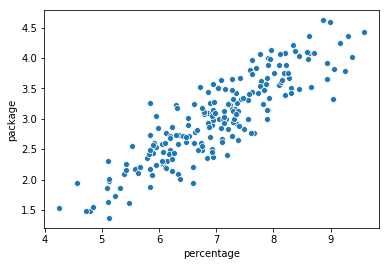

In [5]:
sns.scatterplot(data=df,x="percentage",y="package")

Text(0, 0.5, 'package')

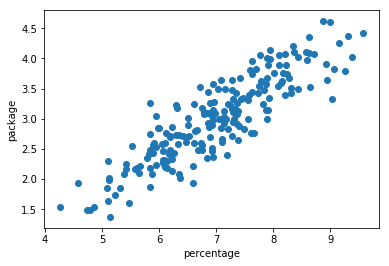

In [6]:
plt.scatter(df['percentage'],df['package'])
plt.xlabel('percentage')
plt.ylabel('package')

# Correlation

In [7]:
df.corr()

,percentage,package
percentage,1.000000,0.880692
package,0.880692,1.000000


In [8]:
# Signing X and y 

x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [9]:
x

,percentage
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
5,7.89
6,6.73
7,6.75
8,6.09
9,8.31


In [10]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
5      2.99
6      2.60
7      2.48
8      2.31
9      3.51
10     1.86
11     2.60
12     3.65
13     2.89
14     3.42
15     3.23
16     2.35
17     2.09
18     2.98
19     2.83
20     3.16
21     2.93
22     2.30
23     2.48
24     2.71
25     3.65
26     3.42
27     2.16
28     2.24
29     3.49
       ... 
170    2.87
171    3.76
172    2.51
173    2.56
174    2.99
175    3.50
176    3.23
177    3.64
178    3.63
179    3.03
180    2.72
181    3.89
182    2.08
183    2.72
184    3.14
185    3.18
186    3.47
187    2.44
188    3.08
189    4.06
190    2.69
191    3.48
192    3.75
193    1.94
194    3.67
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

# Train_Test_Split

This code splits the inputs data(x) and the output data (y) into training and testing sets, with 80% of the data testing(X_test,Y_test), ensuring reproducibility with a specified random seed(random_state=2) 

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
X_train.shape


(160, 1)

In [13]:
X_test.head()

,percentage
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [14]:
y_train.shape

(160,)

In [15]:
y_test.head()

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
Name: package, dtype: float64

This code imports the LinearRegression class from the scikit-learn library, allowing for the Linear Regression



In [16]:
from sklearn.linear_model import LinearRegression

This code initializes an instance of the LinearRegression model, which can be used for Linear Regression



In [17]:
lr = LinearRegression()

# fit()

In [18]:
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
X_test.head()

,percentage
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [20]:
lr.coef_

array([0.55795197])

In [21]:
lr.intercept_

-0.8961119222429144

it predicts the output (y) for a single input data point(7.15) using the trained linear regression model(lr)

In [22]:
lr.predict([[7.15]])

array([3.09324469])

In [23]:
lr.predict([[6]])

array([2.45159992])

In [24]:
lr.predict([[9]])

array([4.12545584])

In [25]:
df

,percentage,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


Text(0, 0.5, 'package')

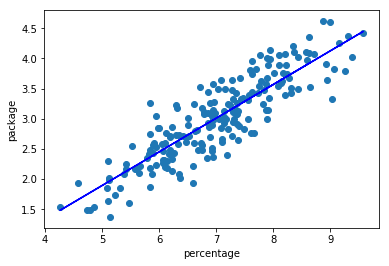

In [26]:
plt.scatter(df['percentage'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='blue')
plt.xlabel('percentage')
plt.ylabel('package')

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [28]:
y_pred = lr.predict(X_test)

In [29]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

# MAE

In [30]:
mean_absolute_error(y_test,y_pred)

0.2884710931878175

# MSE

In [31]:
mean_squared_error(y_test,y_pred)

0.12129235313495527

# RMSE

In [32]:
import pandas as pd 
from sklearn.metrics import mean_squared_error

# Calculate mean squared error 
MSE = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error 
RMSE = MSE ** 0.5

# Create a DataFrame to show y_test and y_pred 
data_rmse = {'Actual (y_test)': y_test, 'Predicted (y_pred)': y_pred} 
df_rmse = pd.DataFrame(data_rmse)

# Display the DataFrame and RMSE 
df_rmse.head()

,Actual (y_test),Predicted (y_pred)
112,4.10,3.891116
29,3.49,3.093245
182,2.08,2.384646
199,2.33,2.574349
193,1.94,1.653729


# Insights
1. I Learned simple linear regression 
2. I Learned corelation 
3. I also Learned fit(), and Training and testing
